In [2]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

In [2]:
sim = rebound.Simulation()
#sim.units = ('AU', 'yr', 'Msun')
sim.add("Sun")
sim.add("Jupiter")

        

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
<rebound.particle.Particle object at 0x7f32fe7b75c0, m=0.9999999999950272 x=-0.00865699130693278 y=0.0031471981519304187 z=0.00017645994188187622 vx=-0.00018058292004729677 vy=-0.0004936897862045378 vz=8.196782179331712e-06>


In [6]:
sim = rebound.Simulation()

# add sun
sim.add(m=1)
# add jupiter
sim.add(m=0.0009547919099366768, x=4.700873257350307, y=-1.638871658756794, z=-0.09837100227914734, vx=0.1391574941369194, vy=0.4348006080824522, vz=-0.004917193679728236)
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .1
simtime = 100

exit_max_distance = 10
a_list = []
final_a_list = []
rings = 50
as_per_ring = 365
for i in range (rings):

    clear_output(wait=True)
    print(i/rings)

    for j in range (as_per_ring):
    
        # create astroid
        mass = 1e-29
        radius = 2.475+(0.001*i)
        #radius = 2.502
        
        # res on 2.502

        omega =(2*np.pi)/as_per_ring*j
        ecc = 0.2*random.random()

        # add astroid
        sim.add(m=mass,a=radius,omega=omega, e=ecc)

        for years in np.arange(simtime*2*np.pi):

            try:
                sim.step()
                #sim.integrate(years*2.*np.pi)  
                #a_list.append(sim.particles[2].a)
                # delete particle if it escaped the system
            except rebound.Escape as error:
                print(error)
                for j in range(sim.N):
                    p = sim.particles[j]
                    d2 = p.x*p.x + p.y*p.y + p.z*p.z
                    if d2>sim.exit_max_distance**2:
                        index=j # cache index rather than remove here since our loop would go beyond end of particles array

            #sim.integrate(years*2*np.pi)
            a_list.append(sim.particles[2].a)
        final_a_list.append(sim.particles[2].a)
        sim.remove(2)

with open('a_list.csv', 'w') as f1:
      
    # using csv.writer method from CSV package
    write = csv.writer(f1)
    write.writerow(["a_list"])
    write.writerows([a_list])



with open('final_a_list.csv', 'w') as f2:
      
    # using csv.writer method from CSV package
    write = csv.writer(f2)
    write.writerow(["final_a_list"])
    write.writerows([final_a_list])


0.98


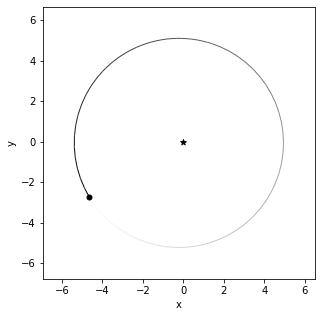

In [10]:
fig, ax = rebound.OrbitPlot(sim) 

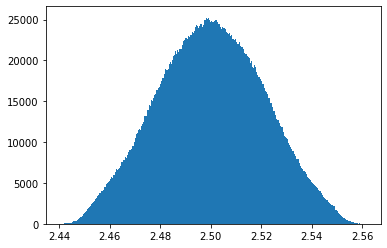

In [12]:
plt.hist(a_list,bins=1000)#,range=(1,4))
plt.show()

In [2]:
print((len(a_list)))

NameError: name 'a_list' is not defined